Proje [linki](https://www.kaggle.com/code/gevorgakopyan/98-7-breast-cancer-dataset-svm-knn-randomforest/notebook)

In [1]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 32)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df["diagnosis_num"] = df["diagnosis"].replace({"B":0, "M":1})

In [8]:
features = abs(df.corr()["diagnosis_num"][(df.corr()["diagnosis_num"]>.2) & (df.corr()["diagnosis_num"]<.9)]).sort_values(ascending=False)
features

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
Name: diagnosis_num, dtype: float64

In [9]:
features =  list(features.index)
features

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean',
 'concave points_se',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'compactness_se',
 'concavity_se']

In [10]:
df[["diagnosis_num"]].value_counts()

diagnosis_num
0                357
1                212
dtype: int64

In [11]:
x = df[features]
y = df["diagnosis_num"]

In [12]:
x

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,...,17.33,0.16220,0.4601,10.38,0.01587,0.11840,0.2419,0.11890,0.04904,0.05373
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,...,23.41,0.12380,0.2750,17.77,0.01340,0.08474,0.1812,0.08902,0.01308,0.01860
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,...,25.53,0.14440,0.3613,21.25,0.02058,0.10960,0.2069,0.08758,0.04006,0.03832
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,...,26.50,0.20980,0.6638,20.38,0.01867,0.14250,0.2597,0.17300,0.07458,0.05661
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,...,16.67,0.13740,0.2364,14.34,0.01885,0.10030,0.1809,0.07678,0.02461,0.05688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,...,26.40,0.14100,0.2060,22.39,0.02454,0.11100,0.1726,0.07115,0.02891,0.05198
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,...,38.25,0.11660,0.2572,28.25,0.01678,0.09780,0.1752,0.06637,0.02423,0.03950
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,...,34.12,0.11390,0.2218,28.08,0.01557,0.08455,0.1590,0.07820,0.03731,0.04730
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,...,39.42,0.16500,0.4087,29.33,0.01664,0.11780,0.2397,0.12400,0.06158,0.07117


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_num, Length: 569, dtype: int64

# Classification Machine Learning

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

In [17]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [43]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2500, batch_size=256, verbose=1)

Epoch 1/2500
2/2 [==============================] - 4s 307ms/step - loss: 0.7608 - accuracy: 0.5604 - val_loss: 0.6924 - val_accuracy: 0.3860
Epoch 2/2500
2/2 [==============================] - 0s 44ms/step - loss: 0.6296 - accuracy: 0.6659 - val_loss: 0.7632 - val_accuracy: 0.3860
Epoch 3/2500
2/2 [==============================] - 0s 41ms/step - loss: 0.5328 - accuracy: 0.7582 - val_loss: 0.9404 - val_accuracy: 0.3772
Epoch 4/2500
2/2 [==============================] - 0s 43ms/step - loss: 0.4367 - accuracy: 0.8066 - val_loss: 1.0652 - val_accuracy: 0.3772
Epoch 5/2500
2/2 [==============================] - 0s 54ms/step - loss: 0.4040 - accuracy: 0.8330 - val_loss: 1.0918 - val_accuracy: 0.3772
Epoch 6/2500
2/2 [==============================] - 0s 49ms/step - loss: 0.3925 - accuracy: 0.8396 - val_loss: 1.0966 - val_accuracy: 0.3772
Epoch 7/2500
2/2 [==============================] - 0s 38ms/step - loss: 0.3652 - accuracy: 0.8681 - val_loss: 1.0828 - val_accuracy: 0.3772
Epoch 8/2500

Epoch 59/2500
2/2 [==============================] - 0s 36ms/step - loss: 0.1399 - accuracy: 0.9538 - val_loss: 0.6734 - val_accuracy: 0.6316
Epoch 60/2500
2/2 [==============================] - 0s 47ms/step - loss: 0.1465 - accuracy: 0.9582 - val_loss: 0.6028 - val_accuracy: 0.6491
Epoch 61/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.1375 - accuracy: 0.9626 - val_loss: 0.5105 - val_accuracy: 0.7368
Epoch 62/2500
2/2 [==============================] - 0s 51ms/step - loss: 0.1368 - accuracy: 0.9582 - val_loss: 0.4830 - val_accuracy: 0.7632
Epoch 63/2500
2/2 [==============================] - 0s 41ms/step - loss: 0.1348 - accuracy: 0.9538 - val_loss: 0.5075 - val_accuracy: 0.7544
Epoch 64/2500
2/2 [==============================] - 0s 38ms/step - loss: 0.1428 - accuracy: 0.9560 - val_loss: 0.5681 - val_accuracy: 0.6842
Epoch 65/2500
2/2 [==============================] - 0s 36ms/step - loss: 0.1301 - accuracy: 0.9626 - val_loss: 0.6591 - val_accuracy: 0.6404
Epoch 

2/2 [==============================] - 0s 46ms/step - loss: 0.0748 - accuracy: 0.9714 - val_loss: 0.0613 - val_accuracy: 0.9649
Epoch 174/2500
2/2 [==============================] - 0s 49ms/step - loss: 0.0594 - accuracy: 0.9846 - val_loss: 0.0933 - val_accuracy: 0.9561
Epoch 175/2500
2/2 [==============================] - 0s 50ms/step - loss: 0.0745 - accuracy: 0.9780 - val_loss: 0.1163 - val_accuracy: 0.9474
Epoch 176/2500
2/2 [==============================] - 0s 53ms/step - loss: 0.0656 - accuracy: 0.9802 - val_loss: 0.0805 - val_accuracy: 0.9649
Epoch 177/2500
2/2 [==============================] - 0s 88ms/step - loss: 0.0679 - accuracy: 0.9802 - val_loss: 0.0652 - val_accuracy: 0.9737
Epoch 178/2500
2/2 [==============================] - 0s 23ms/step - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0797 - val_accuracy: 0.9649
Epoch 179/2500
2/2 [==============================] - 0s 16ms/step - loss: 0.0750 - accuracy: 0.9714 - val_loss: 0.0988 - val_accuracy: 0.9561
Epoch 180/2500

2/2 [==============================] - 0s 31ms/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.1632 - val_accuracy: 0.9474
Epoch 288/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0455 - accuracy: 0.9890 - val_loss: 0.1428 - val_accuracy: 0.9474
Epoch 289/2500
2/2 [==============================] - 0s 29ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0835 - val_accuracy: 0.9561
Epoch 290/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0532 - accuracy: 0.9824 - val_loss: 0.0628 - val_accuracy: 0.9737
Epoch 291/2500
2/2 [==============================] - 0s 29ms/step - loss: 0.0488 - accuracy: 0.9824 - val_loss: 0.1321 - val_accuracy: 0.9474
Epoch 292/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0539 - accuracy: 0.9868 - val_loss: 0.1812 - val_accuracy: 0.9474
Epoch 293/2500
2/2 [==============================] - 0s 29ms/step - loss: 0.0502 - accuracy: 0.9868 - val_loss: 0.2291 - val_accuracy: 0.9474
Epoch 294/2500

2/2 [==============================] - 0s 32ms/step - loss: 0.0626 - accuracy: 0.9824 - val_loss: 0.3970 - val_accuracy: 0.9123
Epoch 402/2500
2/2 [==============================] - 0s 23ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.4388 - val_accuracy: 0.8947
Epoch 403/2500
2/2 [==============================] - 0s 41ms/step - loss: 0.0445 - accuracy: 0.9890 - val_loss: 0.3861 - val_accuracy: 0.9123
Epoch 404/2500
2/2 [==============================] - 0s 36ms/step - loss: 0.0542 - accuracy: 0.9802 - val_loss: 0.2653 - val_accuracy: 0.9298
Epoch 405/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0590 - accuracy: 0.9846 - val_loss: 0.2704 - val_accuracy: 0.9298
Epoch 406/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0545 - accuracy: 0.9780 - val_loss: 0.3566 - val_accuracy: 0.9211
Epoch 407/2500
2/2 [==============================] - 0s 24ms/step - loss: 0.0452 - accuracy: 0.9846 - val_loss: 0.3853 - val_accuracy: 0.9211
Epoch 408/2500

2/2 [==============================] - 0s 46ms/step - loss: 0.0487 - accuracy: 0.9868 - val_loss: 0.0831 - val_accuracy: 0.9561
Epoch 516/2500
2/2 [==============================] - 0s 32ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.1130 - val_accuracy: 0.9649
Epoch 517/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0862 - val_accuracy: 0.9649
Epoch 518/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0920 - val_accuracy: 0.9825
Epoch 519/2500
2/2 [==============================] - 0s 32ms/step - loss: 0.0401 - accuracy: 0.9824 - val_loss: 0.1942 - val_accuracy: 0.9474
Epoch 520/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.1122 - val_accuracy: 0.9649
Epoch 521/2500
2/2 [==============================] - 0s 32ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.0827 - val_accuracy: 0.9561
Epoch 522/2500

2/2 [==============================] - 0s 25ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.3575 - val_accuracy: 0.9386
Epoch 630/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.4312 - val_accuracy: 0.9211
Epoch 631/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0326 - accuracy: 0.9890 - val_loss: 0.4851 - val_accuracy: 0.9211
Epoch 632/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0391 - accuracy: 0.9890 - val_loss: 0.4242 - val_accuracy: 0.9211
Epoch 633/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 0.3512 - val_accuracy: 0.9386
Epoch 634/2500
2/2 [==============================] - 0s 41ms/step - loss: 0.0230 - accuracy: 0.9956 - val_loss: 0.1369 - val_accuracy: 0.9649
Epoch 635/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0740 - val_accuracy: 0.9825
Epoch 636/2500

2/2 [==============================] - 0s 34ms/step - loss: 0.0184 - accuracy: 0.9868 - val_loss: 0.1698 - val_accuracy: 0.9649
Epoch 744/2500
2/2 [==============================] - 0s 16ms/step - loss: 0.0114 - accuracy: 0.9956 - val_loss: 0.1783 - val_accuracy: 0.9561
Epoch 745/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0129 - accuracy: 0.9934 - val_loss: 0.4135 - val_accuracy: 0.9211
Epoch 746/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0301 - accuracy: 0.9890 - val_loss: 0.4187 - val_accuracy: 0.9211
Epoch 747/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.3283 - val_accuracy: 0.9386
Epoch 748/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0199 - accuracy: 0.9912 - val_loss: 0.0887 - val_accuracy: 0.9825
Epoch 749/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0608 - val_accuracy: 0.9737
Epoch 750/2500

2/2 [==============================] - 0s 36ms/step - loss: 0.0511 - accuracy: 0.9802 - val_loss: 0.4168 - val_accuracy: 0.9211
Epoch 858/2500
2/2 [==============================] - 0s 31ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.5136 - val_accuracy: 0.9211
Epoch 859/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0085 - accuracy: 0.9956 - val_loss: 0.4545 - val_accuracy: 0.9211
Epoch 860/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.3885 - val_accuracy: 0.9298
Epoch 861/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0190 - accuracy: 0.9912 - val_loss: 0.2787 - val_accuracy: 0.9474
Epoch 862/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.2286 - val_accuracy: 0.9649
Epoch 863/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0099 - accuracy: 0.9956 - val_loss: 0.2241 - val_accuracy: 0.9649
Epoch 864/2500

2/2 [==============================] - 0s 33ms/step - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.2641 - val_accuracy: 0.9474
Epoch 972/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.2525 - val_accuracy: 0.9474
Epoch 973/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2655 - val_accuracy: 0.9474
Epoch 974/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.2538 - val_accuracy: 0.9561
Epoch 975/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9561
Epoch 976/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0081 - accuracy: 0.9956 - val_loss: 0.2074 - val_accuracy: 0.9649
Epoch 977/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1933 - val_accuracy: 0.9649
Epoch 978/2500

2/2 [==============================] - 0s 33ms/step - loss: 0.0102 - accuracy: 0.9934 - val_loss: 0.4889 - val_accuracy: 0.9123
Epoch 1086/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.3645 - val_accuracy: 0.9386
Epoch 1087/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.2631 - val_accuracy: 0.9474
Epoch 1088/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0119 - accuracy: 0.9956 - val_loss: 0.1555 - val_accuracy: 0.9561
Epoch 1089/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9649
Epoch 1090/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0167 - accuracy: 0.9912 - val_loss: 0.1589 - val_accuracy: 0.9561
Epoch 1091/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0255 - accuracy: 0.9890 - val_loss: 0.1015 - val_accuracy: 0.9561
Epoch 10

2/2 [==============================] - 0s 33ms/step - loss: 0.0081 - accuracy: 0.9978 - val_loss: 0.2086 - val_accuracy: 0.9474
Epoch 1143/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0115 - accuracy: 0.9956 - val_loss: 0.1876 - val_accuracy: 0.9386
Epoch 1144/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9386
Epoch 1145/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.1650 - val_accuracy: 0.9474
Epoch 1146/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.1571 - val_accuracy: 0.9561
Epoch 1147/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0240 - accuracy: 0.9890 - val_loss: 0.1501 - val_accuracy: 0.9649
Epoch 1148/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.1208 - val_accuracy: 0.9649
Epoch 11

2/2 [==============================] - 0s 33ms/step - loss: 0.0228 - accuracy: 0.9912 - val_loss: 0.0942 - val_accuracy: 0.9649
Epoch 1200/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0482 - accuracy: 0.9802 - val_loss: 0.0555 - val_accuracy: 0.9737
Epoch 1201/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0732 - val_accuracy: 0.9737
Epoch 1202/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0724 - val_accuracy: 0.9649
Epoch 1203/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0205 - accuracy: 0.9912 - val_loss: 0.0371 - val_accuracy: 0.9912
Epoch 1204/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0290 - accuracy: 0.9934 - val_loss: 0.0291 - val_accuracy: 0.9825
Epoch 1205/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0279 - val_accuracy: 0.9912
Epoch 12

2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.9474
Epoch 1257/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0096 - accuracy: 0.9956 - val_loss: 0.3642 - val_accuracy: 0.9474
Epoch 1258/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3604 - val_accuracy: 0.9474
Epoch 1259/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0117 - accuracy: 0.9912 - val_loss: 0.3318 - val_accuracy: 0.9386
Epoch 1260/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.2268 - val_accuracy: 0.9474
Epoch 1261/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0061 - accuracy: 0.9956 - val_loss: 0.1568 - val_accuracy: 0.9561
Epoch 1262/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0993 - val_accuracy: 0.9825
Epoch 12

2/2 [==============================] - 0s 34ms/step - loss: 0.0145 - accuracy: 0.9978 - val_loss: 0.1458 - val_accuracy: 0.9649
Epoch 1314/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9649
Epoch 1315/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0142 - accuracy: 0.9978 - val_loss: 0.0523 - val_accuracy: 0.9649
Epoch 1316/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0069 - accuracy: 0.9956 - val_loss: 0.0781 - val_accuracy: 0.9649
Epoch 1317/2500
2/2 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 0.9956 - val_loss: 0.0977 - val_accuracy: 0.9737
Epoch 1318/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.1144 - val_accuracy: 0.9737
Epoch 1319/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0318 - accuracy: 0.9912 - val_loss: 0.1762 - val_accuracy: 0.9737
Epoch 13

2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.9614 - val_accuracy: 0.7807
Epoch 1371/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0070 - accuracy: 0.9956 - val_loss: 2.3263 - val_accuracy: 0.7632
Epoch 1372/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0309 - accuracy: 0.9890 - val_loss: 2.6560 - val_accuracy: 0.7456
Epoch 1373/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 2.8045 - val_accuracy: 0.7456
Epoch 1374/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0474 - accuracy: 0.9890 - val_loss: 2.8770 - val_accuracy: 0.7368
Epoch 1375/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.2224 - val_accuracy: 0.7193
Epoch 1376/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0272 - accuracy: 0.9890 - val_loss: 2.6663 - val_accuracy: 0.7456
Epoch 13

2/2 [==============================] - 0s 33ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0552 - val_accuracy: 0.9737
Epoch 1428/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0093 - accuracy: 0.9956 - val_loss: 0.0723 - val_accuracy: 0.9737
Epoch 1429/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9474
Epoch 1430/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.2832 - val_accuracy: 0.9474
Epoch 1431/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2846 - val_accuracy: 0.9561
Epoch 1432/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.2744 - val_accuracy: 0.9561
Epoch 1433/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.9561
Epoch 14

2/2 [==============================] - 0s 33ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2371 - val_accuracy: 0.9649
Epoch 1485/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2440 - val_accuracy: 0.9649
Epoch 1486/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9649
Epoch 1487/2500
2/2 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2197 - val_accuracy: 0.9649
Epoch 1488/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.2026 - val_accuracy: 0.9649
Epoch 1489/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0041 - accuracy: 0.9978 - val_loss: 0.2047 - val_accuracy: 0.9649
Epoch 1490/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0180 - accuracy: 0.9934 - val_loss: 0.1886 - val_accuracy: 0.9649
Epoch 14

2/2 [==============================] - 0s 34ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9737
Epoch 1542/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0953 - val_accuracy: 0.9737
Epoch 1543/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0237 - accuracy: 0.9912 - val_loss: 0.1330 - val_accuracy: 0.9737
Epoch 1544/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0236 - accuracy: 0.9934 - val_loss: 0.1859 - val_accuracy: 0.9386
Epoch 1545/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.1522 - val_accuracy: 0.9561
Epoch 1546/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0207 - accuracy: 0.9890 - val_loss: 0.1263 - val_accuracy: 0.9649
Epoch 1547/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1638 - val_accuracy: 0.9561
Epoch 15

2/2 [==============================] - 0s 33ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.5009 - val_accuracy: 0.9211
Epoch 1599/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.4488 - val_accuracy: 0.9211
Epoch 1600/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.4093 - val_accuracy: 0.9298
Epoch 1601/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0349 - accuracy: 0.9934 - val_loss: 0.3692 - val_accuracy: 0.9211
Epoch 1602/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.3163 - val_accuracy: 0.9386
Epoch 1603/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.3441 - val_accuracy: 0.9298
Epoch 1604/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4190 - val_accuracy: 0.9211
Epoch 16

2/2 [==============================] - 0s 33ms/step - loss: 0.0096 - accuracy: 0.9956 - val_loss: 0.3437 - val_accuracy: 0.9386
Epoch 1656/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0093 - accuracy: 0.9956 - val_loss: 0.1669 - val_accuracy: 0.9561
Epoch 1657/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9649
Epoch 1658/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0221 - accuracy: 0.9912 - val_loss: 0.0879 - val_accuracy: 0.9737
Epoch 1659/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0053 - accuracy: 0.9978 - val_loss: 0.1283 - val_accuracy: 0.9649
Epoch 1660/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0115 - accuracy: 0.9956 - val_loss: 0.1480 - val_accuracy: 0.9561
Epoch 1661/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1409 - val_accuracy: 0.9649
Epoch 16

2/2 [==============================] - 0s 33ms/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.2154 - val_accuracy: 0.9561
Epoch 1713/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0192 - accuracy: 0.9912 - val_loss: 0.1983 - val_accuracy: 0.9649
Epoch 1714/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0104 - accuracy: 0.9956 - val_loss: 0.1822 - val_accuracy: 0.9737
Epoch 1715/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0288 - accuracy: 0.9934 - val_loss: 0.1913 - val_accuracy: 0.9649
Epoch 1716/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.2442 - val_accuracy: 0.9649
Epoch 1717/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.2451 - val_accuracy: 0.9649
Epoch 1718/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0043 - accuracy: 0.9978 - val_loss: 0.2423 - val_accuracy: 0.9649
Epoch 17

2/2 [==============================] - 0s 33ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9649
Epoch 1770/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0124 - accuracy: 0.9978 - val_loss: 0.3541 - val_accuracy: 0.9474
Epoch 1771/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.3396 - val_accuracy: 0.9474
Epoch 1772/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.2691 - val_accuracy: 0.9474
Epoch 1773/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0059 - accuracy: 0.9956 - val_loss: 0.1696 - val_accuracy: 0.9649
Epoch 1774/2500
2/2 [==============================] - 0s 17ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.1233 - val_accuracy: 0.9737
Epoch 1775/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0040 - accuracy: 0.9978 - val_loss: 0.0731 - val_accuracy: 0.9825
Epoch 17

2/2 [==============================] - 0s 34ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9561
Epoch 1827/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0073 - accuracy: 0.9956 - val_loss: 0.2885 - val_accuracy: 0.9474
Epoch 1828/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.2116 - val_accuracy: 0.9561
Epoch 1829/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9825
Epoch 1830/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0140 - accuracy: 0.9978 - val_loss: 0.0515 - val_accuracy: 0.9825
Epoch 1831/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9825
Epoch 1832/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0445 - val_accuracy: 0.9912
Epoch 18

Epoch 1883/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9737
Epoch 1884/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0182 - accuracy: 0.9934 - val_loss: 0.1259 - val_accuracy: 0.9649
Epoch 1885/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9737
Epoch 1886/2500
2/2 [==============================] - 0s 33ms/step - loss: 8.2195e-04 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9649
Epoch 1887/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0079 - accuracy: 0.9956 - val_loss: 0.2116 - val_accuracy: 0.9737
Epoch 1888/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2143 - val_accuracy: 0.9737
Epoch 1889/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.1018 - accuracy: 0.9692 - val_loss: 0.2295 - val_accur

Epoch 1940/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1700 - val_accuracy: 0.9561
Epoch 1941/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.5213 - val_accuracy: 0.9123
Epoch 1942/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.5982 - val_accuracy: 0.9123
Epoch 1943/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6204 - val_accuracy: 0.9123
Epoch 1944/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0109 - accuracy: 0.9934 - val_loss: 0.6202 - val_accuracy: 0.9123
Epoch 1945/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0179 - accuracy: 0.9934 - val_loss: 0.3387 - val_accuracy: 0.9386
Epoch 1946/2500
2/2 [==============================] - 0s 16ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.1158 - val_accuracy:

Epoch 1997/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.3022 - val_accuracy: 0.9474
Epoch 1998/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.1296 - val_accuracy: 0.9649
Epoch 1999/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.4115 - val_accuracy: 0.9298
Epoch 2000/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0116 - accuracy: 0.9956 - val_loss: 0.9104 - val_accuracy: 0.8860
Epoch 2001/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.9910 - val_accuracy: 0.8684
Epoch 2002/2500
2/2 [==============================] - 0s 32ms/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.7077 - val_accuracy: 0.8947
Epoch 2003/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5311 - val_accuracy:

Epoch 2054/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 0.1457 - val_accuracy: 0.9561
Epoch 2055/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0119 - accuracy: 0.9956 - val_loss: 0.2546 - val_accuracy: 0.9474
Epoch 2056/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.5607 - val_accuracy: 0.8947
Epoch 2057/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0164 - accuracy: 0.9934 - val_loss: 0.7527 - val_accuracy: 0.8596
Epoch 2058/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.6960 - val_accuracy: 0.8596
Epoch 2059/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6429 - val_accuracy: 0.8684
Epoch 2060/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.5192 - val_accuracy:

Epoch 2111/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0443 - val_accuracy: 0.9737
Epoch 2112/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0428 - val_accuracy: 0.9737
Epoch 2113/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0228 - accuracy: 0.9956 - val_loss: 0.0843 - val_accuracy: 0.9561
Epoch 2114/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1206 - val_accuracy: 0.9561
Epoch 2115/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1406 - val_accuracy: 0.9649
Epoch 2116/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.1543 - val_accuracy: 0.9561
Epoch 2117/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.1510 - val_accuracy:

Epoch 2168/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.2584 - val_accuracy: 0.9474
Epoch 2169/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9561
Epoch 2170/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.2251 - val_accuracy: 0.9561
Epoch 2171/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0047 - accuracy: 0.9978 - val_loss: 0.1954 - val_accuracy: 0.9737
Epoch 2172/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1513 - val_accuracy: 0.9737
Epoch 2173/2500
2/2 [==============================] - 0s 17ms/step - loss: 0.0116 - accuracy: 0.9934 - val_loss: 0.1023 - val_accuracy: 0.9825
Epoch 2174/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0370 - accuracy: 0.9912 - val_loss: 0.0899 - val_accuracy:

Epoch 2225/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.2032 - val_accuracy: 0.9649
Epoch 2226/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0060 - accuracy: 0.9956 - val_loss: 0.1947 - val_accuracy: 0.9649
Epoch 2227/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0074 - accuracy: 0.9956 - val_loss: 0.0604 - val_accuracy: 0.9649
Epoch 2228/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1135 - val_accuracy: 0.9649
Epoch 2229/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.2746 - val_accuracy: 0.9386
Epoch 2230/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0107 - accuracy: 0.9956 - val_loss: 0.3942 - val_accuracy: 0.9035
Epoch 2231/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2670 - val_accuracy:

Epoch 2282/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0032 - accuracy: 0.9978 - val_loss: 0.2317 - val_accuracy: 0.9649
Epoch 2283/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 0.9561
Epoch 2284/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0144 - accuracy: 0.9934 - val_loss: 0.1918 - val_accuracy: 0.9561
Epoch 2285/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0222 - accuracy: 0.9956 - val_loss: 0.1074 - val_accuracy: 0.9649
Epoch 2286/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9649
Epoch 2287/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.1663 - val_accuracy: 0.9561
Epoch 2288/2500
2/2 [==============================] - 0s 33ms/step - loss: 6.6653e-04 - accuracy: 1.0000 - val_loss: 0.2040 - val_accur

Epoch 2339/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9737
Epoch 2340/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0196 - accuracy: 0.9912 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 2341/2500
2/2 [==============================] - 0s 34ms/step - loss: 9.7467e-04 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9649
Epoch 2342/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0043 - accuracy: 0.9978 - val_loss: 0.1969 - val_accuracy: 0.9737
Epoch 2343/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2028 - val_accuracy: 0.9737
Epoch 2344/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2051 - val_accuracy: 0.9737
Epoch 2345/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2026 - val_accur

Epoch 2396/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9474
Epoch 2397/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0041 - accuracy: 0.9978 - val_loss: 0.1586 - val_accuracy: 0.9474
Epoch 2398/2500
2/2 [==============================] - 0s 34ms/step - loss: 0.0129 - accuracy: 0.9978 - val_loss: 0.1317 - val_accuracy: 0.9649
Epoch 2399/2500
2/2 [==============================] - 0s 33ms/step - loss: 8.5952e-04 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9649
Epoch 2400/2500
2/2 [==============================] - 0s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 2401/2500
2/2 [==============================] - 0s 50ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1432 - val_accuracy: 0.9649
Epoch 2402/2500
2/2 [==============================] - 0s 32ms/step - loss: 7.5901e-04 - accuracy: 1.0000 - val_loss: 0.1751 - val_a

In [44]:
model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.9670


[0.12454333156347275, 0.9670329689979553]

In [45]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9737


[0.09609932452440262, 0.9736841917037964]

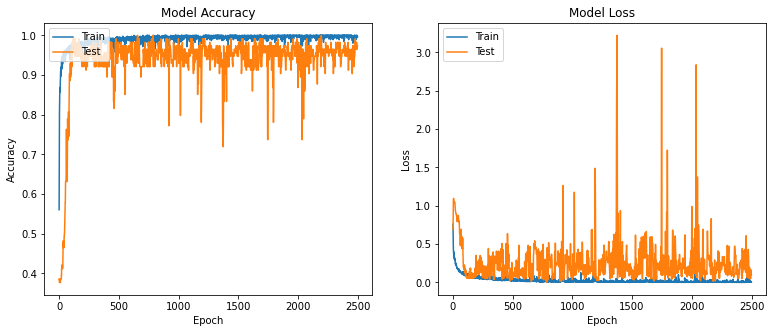

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();